In [2]:
import pandas as pd
data = pd.read_csv('StudentsPerformance.csv')
data.to_csv('clean_data.csv')
data.to_csv ('processed data.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data['Total_Score'] = data['math score'] + data['writing score'] + data['reading score']
data['average'] = data['Total_Score']/3
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


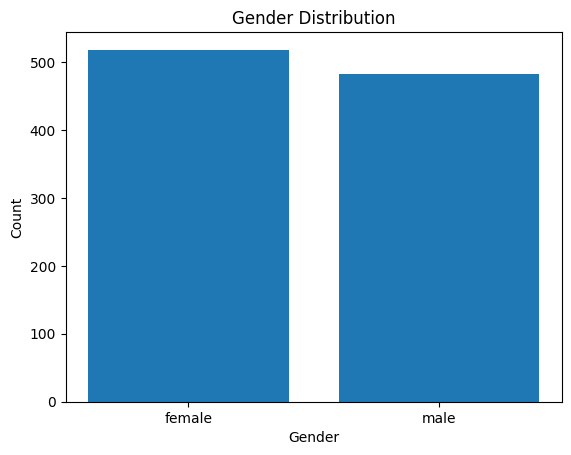

In [5]:
import matplotlib.pyplot as plt
# visualization 1: Bar plot of gender distribution
gender_counts = data['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig ('Gender_distribution.png')
plt.show()

In [6]:
pip install seaborn

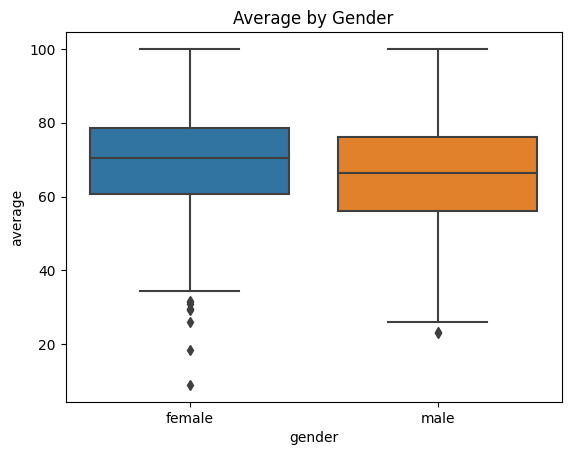

In [8]:
import seaborn as sns
# visualization 2: Box plot of math scores by gender
sns.boxplot(x='gender', y='average', data=data)
plt.title('Average by Gender')
plt.savefig ('Math_Scores_by_Gender.png')
plt.show()

In [9]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

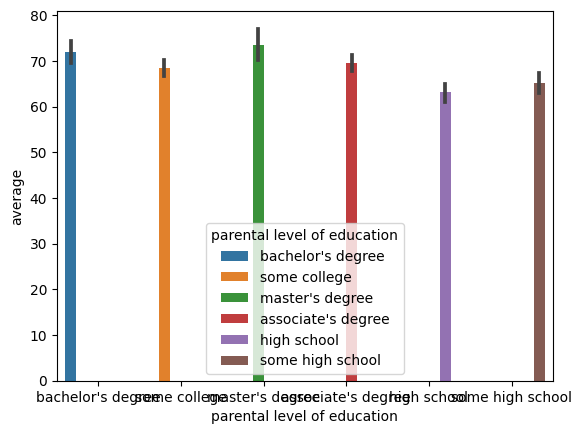

In [12]:
parentgraph= sns.barplot(data = data, x = 'parental level of education', y= 'average', hue = 'parental level of education')
fig_parent= parentgraph.get_figure()
fig_parent.savefig("parentimage.jpeg")

#masters degree has better avg score

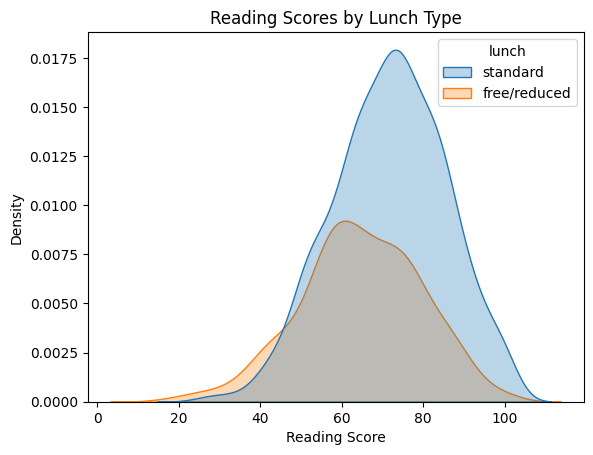

In [13]:
# visualization 4: Density plot of writing scores by lunch type
sns.kdeplot(x='reading score', data=data, hue='lunch', fill=True, alpha=.3)
plt.title('Reading Scores by Lunch Type')
plt.xlabel('Reading Score')
plt.savefig ('Reading_Scores_by_Lunch_Type.png')
plt.show()

In [14]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [15]:

#find the count
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


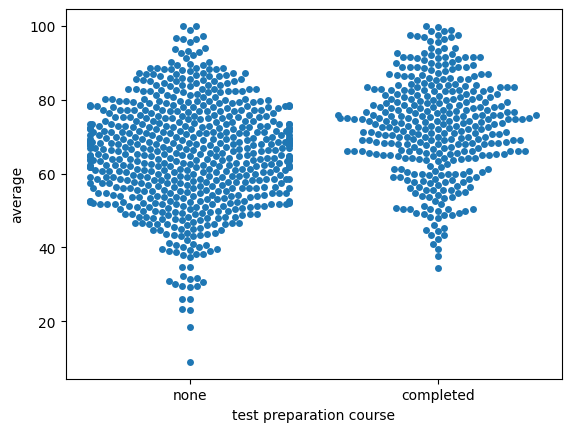

In [16]:
graph_test_prep=sns.swarmplot(x ='test preparation course', y= 'average', data = data)
fig_testprep=graph_test_prep.get_figure()
fig_testprep.savefig("testprep.jpeg")

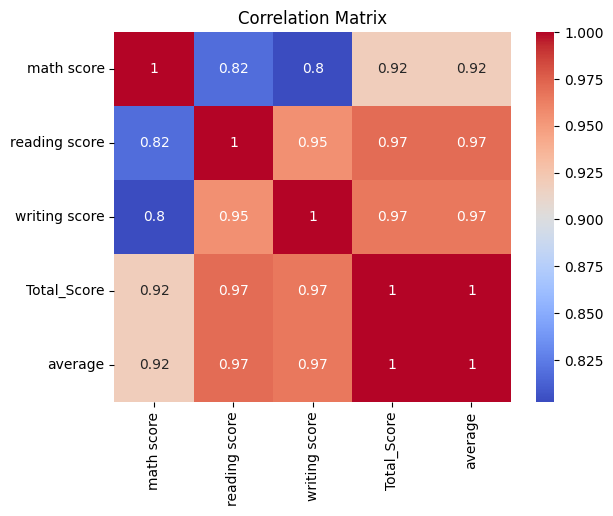

In [17]:
# visualization 5: Heatmap of correlation matrix
corr= data.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.savefig ('Correlation_Matrix.png')
plt.show()